In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ=pd.read_csv('data/fuel_econ.csv')
fuel_econ.shape
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [3]:
fuel_econ['trans_type']=fuel_econ['trans'].apply(lambda x:x.split()[0])

In [18]:
sb.heatmap(ct_counts,annot=True,fmt='d');

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [19]:
ct_counts=fuel_econ.groupby(['VClass','trans_type']).size()
ct_counts=ct_counts.reset_index(name='count')
ct_counts.pivot(index='VClass',columns='trans_type',values='count')

trans_type,Automatic,Manual
VClass,,
Compact Cars,784,338
Large Cars,605,20
Midsize Cars,989,199
Minicompact Cars,188,133
Subcompact Cars,502,171


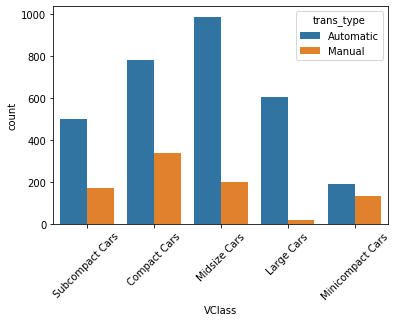

In [23]:
sb.countplot(data=fuel_econ,x='VClass',hue='trans_type');
plt.xticks(rotation=45);